# Classificador de Fake News

**Fake news**, ou notícias falsas, refere-se a **informações enganosas**, fabricadas ou distorcidas, **apresentadas como sendo verdadeiras** e divulgadas através de diversos meios de comunicação, especialmente nas plataformas online e redes sociais. Essas notícias são projetadas para enganar os leitores e criar uma narrativa falsa ou manipulada, muitas vezes com o intuito de influenciar opiniões, desinformar ou prejudicar pessoas, instituições ou grupos específicos.

O impacto das fake news na sociedade é significativo e preocupante. Primeiramente, elas minam a confiança nas fontes de informação tradicionais, como jornais, revistas e veículos de notícias estabelecidos. As pessoas podem ter dificuldade em distinguir entre informações verdadeiras e falsas, o que leva a um declínio na qualidade do debate público e na formação de opiniões informadas.

<p align=center>
  <img src="Arquivos/fake-news-concept.jpg" width="70%">
</p>

Combater as fake news é um desafio complexo que requer esforços conjuntos de governos, plataformas de mídia social, veículos de comunicação e indivíduos. É necessário promover a alfabetização midiática e desenvolver habilidades críticas de pensamento entre os cidadãos para que possam discernir entre informações verdadeiras e falsas. Além disso, é importante responsabilizar aqueles que deliberadamente disseminam desinformação, bem como promover a transparência e a veracidade na produção e compartilhamento de notícias.



## Como isso influencia nossa vida?

Como de costume, nós tendemos a acreditar nos grandes veículos de mídia, ou de pessoas do nosso ciclo de amigos que nos encaminham notícias em redes sociais. Dessa forma, criamos o hábito de não checar nossas fontes, e assim, acreditamos e disseminamos notícias falsas, às vezes sem nem saber.

Isso se torna um grande problema quando afeta o resultado de algo importante no bem comum de nossa sociedade, como resultados de eleições, opinião pública sobre determinados projetos, políticas públicas, e até pessoas públicas, sejam elas do meio político, artístico, jornalístico, ou qualquer outro.

## O Projeto

Hoje em dia, podemos contar com ferramentas que nos ajudem a identificar e filtrar notícias falsas. Com técnicas de *Machine Learning* como **Redes Neurais** essa tarefa de vasculhar diversas fontes de notícias para descobrir o que é falso e o que é factual fica mais fácil.

> O objetivo do projeto é treinar um modelo que seja capaz de classificar notícias, com a melhor acurácia possível, entre falsas ou factuais.

Para isso, usaremos a biblioteca ***Tensorflow*** para treinar Redes Neurais que façam esse trabalho por nós.

### Obtenção dos Dados
Os dados foram obtidos a partir de um csv disponibilizado no [kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). Para essa análise, os datasets True.csv e Fake.csv foram concatenados, originando o dataset "Fake_News.csv". Os valores advindos do primeiro dataset receberam 0 na feature `target`, já os valores advindos de Fake.csv receberam 1.

In [106]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing Tensorflow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras

# Importing Sklearn for metrics
from sklearn.metrics import confusion_matrix

# Configuring the notebook
np.random.seed(42)
sns.set_style()

# Filtering warning messages
import warnings
warnings.filterwarnings('ignore')

In [85]:
# carregando e verificando os dados
df = pd.read_csv("Arquivos/Fake_News.csv")

## Análise dos Dados
Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `title` - Título da notícia
* `text` - Texto da notícia
* `subject` - Assunto da notícia
* `date` - Data em que foi publicada
* `target` que é nossa variável alvo e está dividida em:
  * True (Factual) = 0
  * Fake (Falsa) = 1


## Análise Exploratória dos Dados
Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Nuvem de palavras*
* *Balanceamento do dataset*
* *Feature Engineering*

Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [86]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


Logo de início, pode-se fazer algumas observações:

* A variável `date` vem padronizada e poderá ser dividida.
* A variável `target` é o nosso alvo e indica se a notícia é fake ou não.
* Há várias stopwords presentes no texto. 

Verificarei agora o tamanho do dataset.

In [87]:
# verifica o tamanho do dataset
print("Entradas:", df.shape[0])
print("Variáveis:", df.shape[1])

Entradas: 44898
Variáveis: 5


O dataset possui 45 mil linhas e 5 colunas.

In [88]:
# Extrair o nome das colunas
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [89]:
# Extrair o tipo das variáveis
df.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

A priori, as variáveis aparentam ter o tipo de dado coerente, exceto `date` que poderia ser datetime. Irei verificar agora a porcentagem de itens nulos

In [48]:
# Porcentagem de item nulo
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending = False)

title      0.0
text       0.0
subject    0.0
date       0.0
target     0.0
dtype: float64

Não há itens nulos no dataset.

### Wordcloud

O WordCloud, também conhecido como nuvem de palavras, é uma representação visual de palavras em que o tamanho de cada palavra é proporcional à sua frequência ou importância em um determinado texto. É uma forma de visualização de dados textual que destaca as palavras mais relevantes ou frequentes em um conjunto de informações.

O WordCloud é interessante porque permite uma rápida percepção das palavras-chave em um texto ou conjunto de dados. Ele condensa informações de forma visualmente atraente, fornecendo uma visão geral das palavras mais significativas em um texto, discurso, artigo, feedback de clientes ou qualquer outra fonte de dados de texto.

Plotaremos uma nuvem de palavras para a feature `title` que corresponde ao título da notícia e para a feature `text`, que corresponde ao conteúdo da mesma.

Valores ausentes para title:  0
Quantidade de Palavras: 3641753


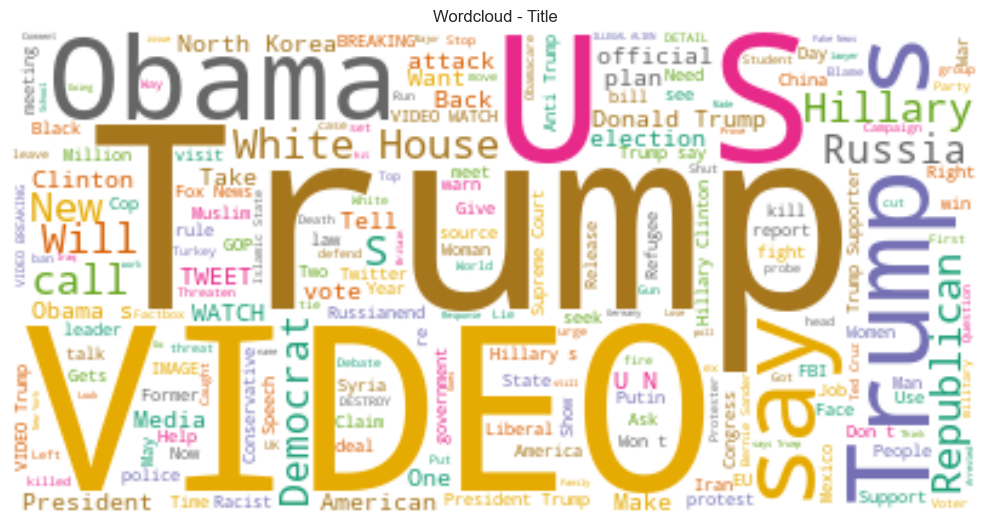

In [90]:
# ver a quantidade de valores ausentes
print("Valores ausentes para title: ", df.title.isnull().sum())

# eliminar as colunas com valores ausentes
title = df.dropna(subset=['title'], axis=0)['title']

# concatenar as palavras
all_title = " ".join(s for s in title)

print("Quantidade de Palavras: {}".format(len(all_title)))

# Lista de stopwords
stopwords = set(STOPWORDS)

# Gerar a Word Cloud com a paleta de cores "Dark2"
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2").generate(all_title)

# Mostrar a imagem final
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Wordcloud - Title')
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.tight_layout()
plt.show()

Pode-se notar que as palavras Trump, Video, US e Obama se destacaram, o que demonstra um forte viés político nos títulos das notícias. 

Valores ausentes para text:  0
Quantidade de Palavras: 110902984


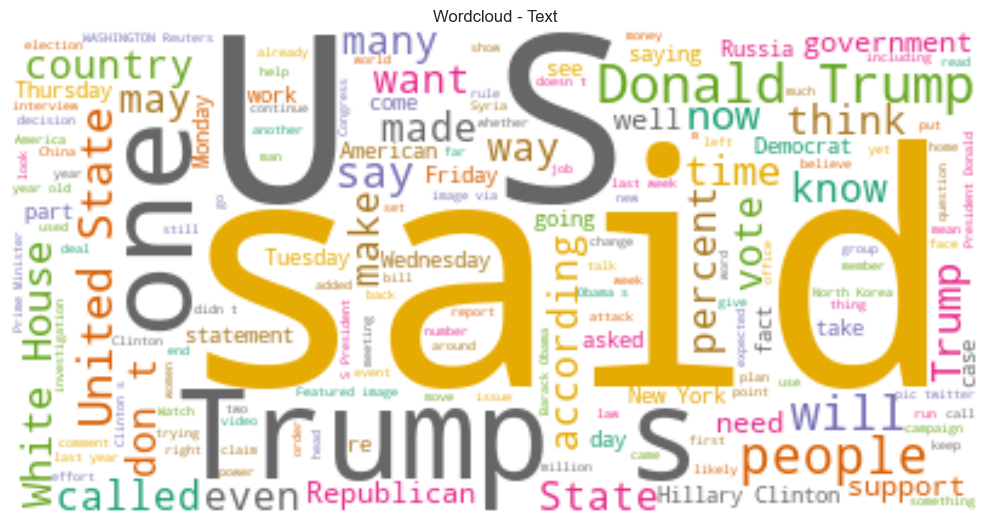

In [91]:
# ver a quantidade de valores ausentes
print("Valores ausentes para text: ", df.text.isnull().sum())

# eliminar as colunas com valores ausentes
text = df.dropna(subset=['text'], axis=0)['text']

# concatenar as palavras
all_text = " ".join(s for s in text)

print("Quantidade de Palavras: {}".format(len(all_text)))

# Lista de stopwords
stopwords = set(STOPWORDS)

# Gerar a Word Cloud com a paleta de cores "Dark2"
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2").generate(all_text)

# Mostrar a imagem final
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Wordcloud - Text')
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.tight_layout()
plt.show()

Já na variável `text` as palavras que se destacaram foram "said", "us", "Trump", entre outras. A distribuição mudou em relação ao título.

### Balanceamento da feature `target`

Também é importante verificar a distribuição de notícias falsas e verdadeiras. Faremos o mesmo ao plotar um gráfico que contará as instâncias da feature `target`.

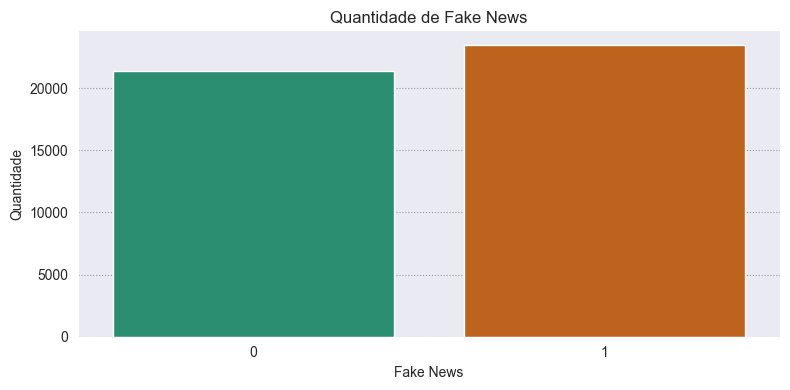

In [92]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Dark2"))
sns.countplot(x='target', data=df)
ax.set_xlabel('Fake News')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Fake News');
plt.tight_layout();

In [93]:
# verificar a porcentagem de balanceamento
round(df['target'].value_counts()/df.shape[0] * 100, 2)

1    52.3
0    47.7
Name: target, dtype: float64

Pode-se perceber que os dados estão balanceados, com 52.3% de dados que são considerados falsos e 47.7% verdadeiros.

### Feature Engineering

Feature Engineering é o processo de criação e seleção de variáveis (também conhecidas como "features") relevantes para um determinado problema de análise de dados. É uma das etapas mais importantes no desenvolvimento de modelos de Machine Learning, uma vez que a qualidade das variáveis usadas para treinar um modelo pode afetar significativamente sua precisão e capacidade de generalização.

Observando os dados, fareis tais modificações:

* Irei separar a coluna `date` entre `month`, `day`, e `year`, pois isso poderá levar a algum insight interessante em relação à classificação de fake news.

In [29]:
df_feature = df.copy()

# Convert the 'date' column to a datetime object
df_feature['date'] = pd.to_datetime(df_feature['date'], errors='coerce')

# Extract the month, day, and year into separate columns as floats
df_feature['month'] = df_feature['date'].dt.month.astype(float)
df_feature['day'] = df_feature['date'].dt.day.astype(float)
df_feature['year'] = df_feature['date'].dt.year.astype(float)

# Handle missing values in the 'date' column
df_feature.loc[df_feature['date'].isnull(), 'date'] = pd.to_datetime(df_feature.loc[df_feature['date'].isnull(), 'date'], format='%d-%b-%y')

# Convert the float columns to integers, replacing non-finite values with NaN
df_feature['month'] = df_feature['month'].replace([-np.inf, np.inf], np.nan).astype(pd.Int32Dtype())
df_feature['day'] = df_feature['day'].replace([-np.inf, np.inf], np.nan).astype(pd.Int32Dtype())
df_feature['year'] = df_feature['year'].replace([-np.inf, np.inf], np.nan).astype(pd.Int32Dtype())

df_feature.drop(columns=['date'], inplace=True)


In [30]:
# mostra as cinco primeiras entradas
df_feature.head()

,title,text,subject,target,month,day,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1,12,31,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1,12,31,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1,12,30,2017
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,1,12,29,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,1,12,25,2017


Agora irei plotar um histograma para observar a frequência nas novas variáveis criadas.

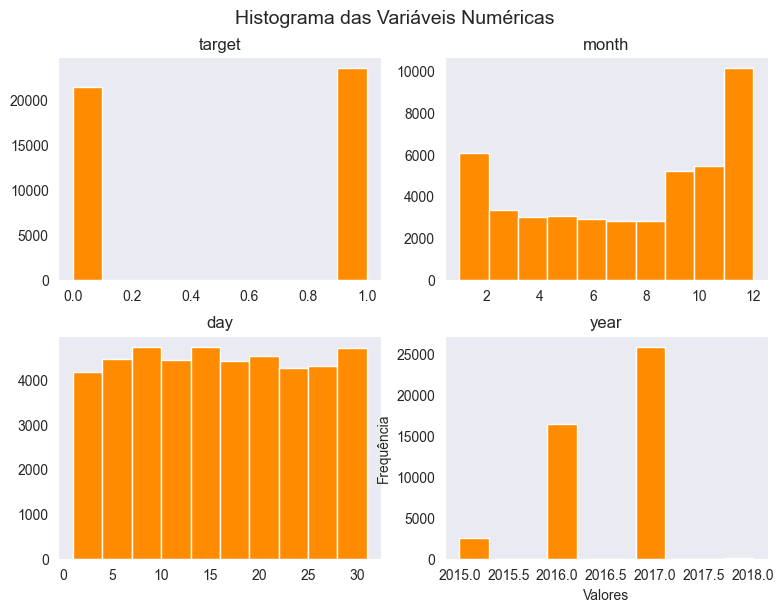

In [99]:
# Crie o histograma das variáveis numéricas
df_feature.hist(color='darkorange', grid=False, figsize=(8, 6))

# Ajuste os títulos e rótulos
plt.tight_layout()
plt.suptitle('Histograma das Variáveis Numéricas', fontsize=14)
plt.subplots_adjust(top=0.9)
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exiba o histograma
plt.show()


Pode-se perceber que:
* Há mais notícias no mês de dezembro
* Há mais publicações em 2017
* A distribuição é balanceada em relação aos dias.
* Os valores são coerentes e consistentes.

Em 2017, ocorreram eleições para outros cargos políticos nos Estados Unidos, como eleições estaduais e locais, o que explica o teor político das wordclouds.

## Tratamento de Strings

Aqui, estamos lidando com nossa linguagem natural em formato de `string`, então precisamos de alguns conhecimentos de NLP para tratar esses dados da melhor forma, para que possam ser passados ao nosso modelo com sucesso, e dessa forma, obtermos os resultados que desejamos.

Abaixo iremos transformar todas as palavras em letras minúsculas e remover pontuações.

In [49]:
# tratando do texto das notícias
import string
def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df_feature['text'] = df_feature['text'].apply(clean_text)
df_feature.head()

,title,text,subject,target,month,day,year
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all ame...,News,1,12,31,2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devi...,News,1,12,31,2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former m...,News,1,12,30,2017
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced ...,News,1,12,29,2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas d...,News,1,12,25,2017


Agora, o que precisamos é separar nossos dados em treino, validação e teste, para que possamos continuar a trilhar o caminho que nos leva ao modelo.

In [50]:
# separando os datasets em treino, validação e teste
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_feature)
train, validation = train_test_split(train, test_size = 0.2)
print('Entradas por Dataset')
print('Dataset de Treino: ',len(train), 'linhas.')
print('Dataset de Validação: ', len(validation), 'linhas.')
print('Dataset de Teste: ', len(test), 'linhas.')

Entradas por Dataset
Dataset de Treino:  26938 linhas.
Dataset de Validação:  6735 linhas.
Dataset de Teste:  11225 linhas.


### Pré-Processamento de Strings - NLP
A tokenização é um processo essencial no pré-processamento de texto, especialmente na área de Processamento de Linguagem Natural (PLN). Consiste em dividir um texto em unidades menores chamadas de tokens, que podem ser palavras individuais, pontuações, símbolos ou até mesmo caracteres.

<p align=center>
  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" height="30%">
</p>

Ao dividir o texto em unidades menores e tratá-las como entidades individuais, podemos realizar uma ampla gama de análises e tarefas linguísticas, permitindo-nos extrair insights valiosos e obter um melhor entendimento dos dados textuais.

In [52]:
# preparando os dados para o modelo
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

# aplicando técnicas tokenizing e padding
training_sequences = tokenizer.texts_to_sequences(np.array(train.text))
training_padded = pad_sequences(training_sequences,truncating=trunc_type, padding=pad_type)

max_length = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation.text))
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

# criando arrays com inputs
x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['target'].values
y_val = validation['target'].values

In [53]:
# veriificando o tamanho dos arrays
print('Tamanho dos Arrays')
print('Treino: ', len(x_train), 'linhas.')
print('Resposta: ', len(y_train), 'linhas.')

Tamanho dos Arrays
Treino:  26938 linhas.
Resposta:  26938 linhas.


Essas etapas foram utilizadas para preparar dados de texto para treinar a rede neural, onde o texto foi convertido em sequências numéricas e aplicado padding para que todas as sequências tenham o mesmo comprimento. Isso permite que os modelos lidem com entradas de tamanho fixo.

### Preparando, Instanciando e Treinando o Modelo

Agora que nossos dados estão prontos, é hora de ir ao que interessa.

Foi feito um RandomSearch para encontrar os melhores parâmetros, em um processo lento e externo a este notebook, e instanciado um modelo que usa os melhores parâmetros encontrados.

O modelo resumido em poucas linhas tem as seguintes características:

* O modelo utiliza camadas de Embedding, Conv1D e Dense.
* A camada de Embedding converte palavras em vetores densos.
* A camada Conv1D extrai recursos das sequências com 16 filtros de tamanho 5.
* A camada GlobalMaxPooling1D reduz a dimensão espacial da saída.
* A camada Dense de saída produz uma probabilidade para classificação binária.

Em resumo, o modelo usa camadas de convolução e pooling para extrair recursos das sequências de texto, seguidas de uma camada densa para realizar a classificação binária.

In [54]:
# instanciando e dando fit no modelo
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length=max_length),
        tf.keras.layers.Conv1D(16, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), 
                      metrics=['accuracy'])
history = model.fit(x_train, y_train, verbose = 2, epochs = 3, validation_data = (x_val, y_val),
                   callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])

Epoch 1/3
842/842 - 541s - loss: 0.0737 - accuracy: 0.9791 - val_loss: 0.0054 - val_accuracy: 0.9982 - 541s/epoch - 642ms/step
Epoch 2/3
842/842 - 560s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9988 - 560s/epoch - 665ms/step
Epoch 3/3
842/842 - 522s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9987 - 522s/epoch - 620ms/step


Durante o treinamento do modelo, foram executadas 3 épocas. Abaixo estão os resultados resumidos de cada época:

* Epoch 1: O treinamento durou aproximadamente 541 segundos por época. A perda (loss) foi de 0.0737 e a acurácia (accuracy) foi de 0.9791. Na validação, a perda foi de 0.0054 e a acurácia foi de 0.9982.

* Epoch 2: O treinamento durou aproximadamente 560 segundos por época. A perda foi reduzida para 0.0033 e a acurácia aumentou para 0.9992. Na validação, a perda foi de 0.0034 e a acurácia foi de 0.9988.

* Epoch 3: O treinamento durou aproximadamente 522 segundos por época. A perda diminuiu ainda mais para 0.0010 e a acurácia aumentou para 0.9999. Na validação, a perda foi de 0.0025 e a acurácia foi de 0.9987.

Os resultados mostram uma diminuição consistente da perda e um aumento na acurácia tanto no treinamento quanto na validação ao longo das épocas, indicando um bom desempenho do modelo na tarefa de classificação binária do texto. Abaixo iremos verificar a acurácia e perda do modelo.

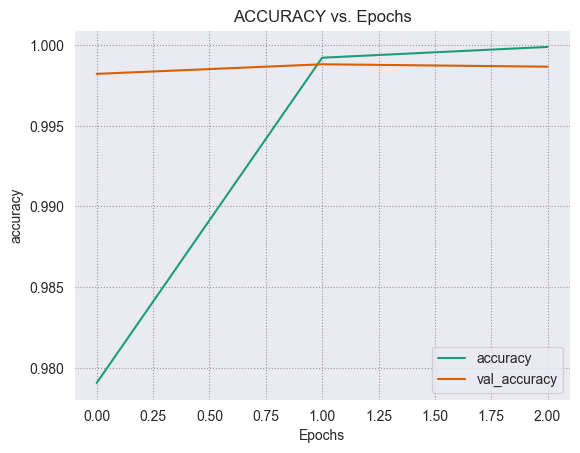

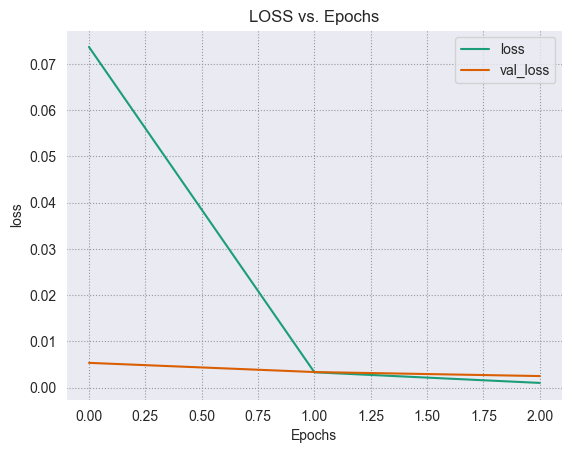

In [104]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.title(string.upper() + ' vs. Epochs')
    plt.show()

# Plot accuracy, loss, precision, and recall
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


### Fazendo Previsões no Conjunto de Teste

Após concluir todas as etapas de preparação dos dados, treinamento e ajuste do modelo com excelentes resultados no conjunto de validação, chegou o momento de testar o modelo com dados completamente novos. Vamos utilizar o conjunto de teste para fazer previsões e avaliar o desempenho do modelo nessa tarefa.

In [66]:
# tratando os dados de teste
test_sequences = tokenizer.texts_to_sequences(np.array(test.text))
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

In [67]:
# fazendo previsões
preds = np.round(model.predict(test_padded))

351/351 [==============================] - 33s 92ms/step


In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Calcular a acurácia
accuracy = accuracy_score(test["target"].values, preds)
print("Accuracy:", round(accuracy, 3))

# Calcular a recall
recall = recall_score(test["target"].values, preds)
print("Recall:", round(recall, 3))

# Calcular a precision
precision = precision_score(test["target"].values, preds)
print("Precision:", round(precision, 3))

Accuracy: 0.999
Recall: 0.998
Precision: 0.999


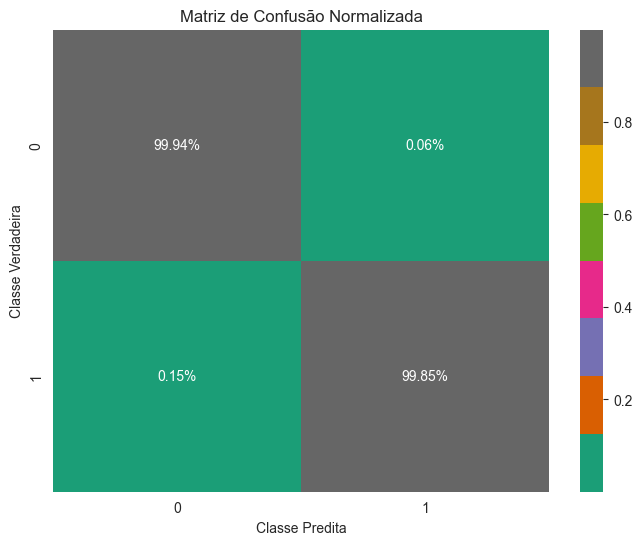

In [105]:
# Calcular a matriz de confusão
cm = confusion_matrix(test["target"].values, preds)

# Normalizar a matriz de confusão para obter as porcentagens
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Definir rótulos das classes
class_names = np.unique(test["target"].values)

# Plotar a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, xticklabels=class_names, yticklabels=class_names, fmt=".2%", cmap = 'Dark2')
plt.title("Matriz de Confusão Normalizada")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()


Os resultados das métricas no conjunto de teste são os seguintes:

* Acurácia (Accuracy): 0.999
* Recall: 0.998
* Precisão (Precision): 0.999

Essas métricas indicam o desempenho do modelo na tarefa de classificar fake news. Uma acurácia de 0.999 significa que o modelo classificou corretamente a grande maioria das amostras no conjunto de teste. O recall de 0.998 indica que o modelo conseguiu identificar corretamente a maioria das amostras positivas (classe 1). A precisão de 0.999 mostra que a maioria das previsões positivas feitas pelo modelo estavam corretas.

Esses resultados indicam que o modelo teve um desempenho muito bom no conjunto de teste, com alta capacidade de acertar as previsões.

## Conclusão

Em conclusão, o projeto "Classificador de Fake News" demonstra a aplicação eficaz de técnicas de ciência de dados, especialmente o uso de **redes neurais**, para combater a disseminação de informações falsas. Através da análise de dados, treinamento do modelo e avaliação de métricas, **foi possível construir um classificador capaz de distinguir notícias verdadeiras das falsas**.

O modelo alcançou **resultados impressionantes**, com uma a**lta acurácia de 99,9% no conjunto de teste**. Isso significa que o modelo foi capaz de **classificar corretamente a grande maioria das amostras**, o que é extremamente promissor no contexto de detecção de fake news. Além disso, métricas como recall e precisão também apresentaram valores elevados, mostrando que **o modelo conseguiu identificar corretamente a maioria das notícias falsas e realizar previsões precisas**.

Ao longo do projeto, também foi possível observar a presença de um **viés político nas notícias**, destacado pela análise das nuvens de palavras. Essa informação é relevante, pois ressalta a importância de garantir a imparcialidade e a objetividade nas fontes de notícias.

No geral, o projeto apresenta uma abordagem sólida para a detecção de fake news e oferece uma contribuição significativa para a promoção de informações verificadas e confiáveis. Com o avanço contínuo da tecnologia e aprimoramento dos modelos de machine learning, é possível vislumbrar um futuro em que ferramentas como essa desempenharão um papel fundamental na luta contra a desinformação e na promoção da transparência e confiabilidade nas notícias.